In [1]:
import getdist.plots as gplot
import math
import getdist
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import numpy as np
import matplotlib
#matplotlib.use('Agg')
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#mpl.rc('text', usetex=True)

import glob


In [56]:
flist = glob.glob('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me10MeV_alpha0.01_7*/2022-07-2*.txt')
idx=1
print(flist)
for f in flist:
    os.system('cp '+f+' /project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp1GeV_me10MeV_alpha0.01/2022-07-22_75000__'+str(idx)+'.txt')
    idx +=1

['/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me10MeV_alpha0.01_7720953/2022-07-22_75000__1.txt', '/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me10MeV_alpha0.01_7720959/2022-07-22_75000__1.txt', '/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me10MeV_alpha0.01_7720960/2022-07-22_75000__1.txt', '/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me10MeV_alpha0.01_7720955/2022-07-22_75000__1.txt', '/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me10MeV_alpha0.01_7720958/2022-07-22_75000__1.txt', '/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me10MeV_alpha0.01_7720957/2022-07-22_75000__1.txt', '/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me10MeV_alpha0.01_7720922/2022-07-22_75000__1.txt', '/pro

In [18]:
print(flist)
#For mp100 me1, the order of the files is [7711585,7711593,7711594,7711595,7711596]

['/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp100GeV_me1MeV_alpha0.01_7711585/2022-07-20_500000__1.txt', '/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp100GeV_me1MeV_alpha0.01_7711593/2022-07-20_500000__1.txt', '/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp100GeV_me1MeV_alpha0.01_7711594/2022-07-20_500000__1.txt', '/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp100GeV_me1MeV_alpha0.01_7711595/2022-07-20_500000__1.txt', '/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp100GeV_me1MeV_alpha0.01_7711596/2022-07-20_500000__1.txt']


In [53]:
#only needs to be done once, already done on july 22. If more files added those need to be run through this. 
ADMdir = '/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/'

mcdir = [ADMdir]
rootname = []
for filesloc in os.listdir(ADMdir):
    print(filesloc)
    for file in os.listdir(ADMdir+filesloc):
        print(file)
        if file.startswith("2022-") & file.endswith("_1.txt"):
            rootname.append(file[0:-6])
            rangesfilename = ADMdir+filesloc+"/"+file[0:-6]+".ranges"
            print('hi')
            # Writing the ranges file
            if os.path.isfile(rangesfilename)==False:
                print('Writing ranges file: '+rangesfilename)
                rangestext = []
                for line in open(ADMdir+filesloc+'/'+'log.param'):
                    li = line.strip()
                    li = li.replace(" ","")
                    if li.startswith("data.parameters") and li.endswith("'cosmo']"):
                        parname = re.findall(r"'(.*?)'", li, re.DOTALL)
                        parrange = li.split(",")
                        if ('None' not in parrange):
                            rangestext.append(" ".join([parname[0],parrange[1],parrange[2]]))

                with open(rangesfilename, 'w') as the_file:
                    the_file.write('\n'.join(rangestext))
            break;

ADM_mp1GeV_me1MeV_alpha0.03_7666899
ADM_mp1GeV_me1MeV_alpha0.03_7666899.log
log.param
2022-07-12_30000_.paramnames
ADM_mp1GeV_me1MeV_alpha0.03_7666899.bestfit
2022-07-12_30000__1.txt
hi
ADM_mp10GeV_me10MeV_alpha0.01_7722454
2022-07-22_95000_.paramnames
2022-07-22_95000__1.txt
hi
Writing ranges file: /project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp10GeV_me10MeV_alpha0.01_7722454/2022-07-22_95000_.ranges
ADM_mp1GeV_me1MeV_alpha0.03_7666906
ADM_mp1GeV_me1MeV_alpha0.03_7666906.log
log.param
2022-07-12_30000_.paramnames
ADM_mp1GeV_me1MeV_alpha0.03_7666906.bestfit
2022-07-12_30000__1.txt
hi
ADM_mp1GeV_me10MeV_alpha0.01_7720953
ADM_mp1GeV_me10MeV_alpha0.01_7720953.bestfit
ADM_mp1GeV_me10MeV_alpha0.01_7720953.log
log.param
2022-07-22_75000_.paramnames
2022-07-22_75000_.ranges
2022-07-22_75000__1.txt
hi
ADM_mp1GeV_me1MeV_alpha0.03_7666881
2022-07-12_500000_.paramnames
log.param
ADM_mp1GeV_me1MeV_alpha0.03_7666881.log
2022-07-12_500000__1.txt
hi
ADM_mp1GeV_me1

ADM_mp1GeV_me10MeV_alpha0.01_7720962
ADM_mp1GeV_me10MeV_alpha0.01_7720962.bestfit
log.param
ADM_mp1GeV_me10MeV_alpha0.01_7720962.log
2022-07-22_75000_.paramnames
2022-07-22_75000__1.txt
hi
Writing ranges file: /project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me10MeV_alpha0.01_7720962/2022-07-22_75000_.ranges
ADM_mp1GeV_me1MeV_alpha0.03_7666867
2022-07-12_500000_.paramnames
ADM_mp1GeV_me1MeV_alpha0.03_7666867.log
log.param
ADM_mp1GeV_me1MeV_alpha0.03_7666867.bestfit
2022-07-12_500000__1.txt
hi
ADM_mp1GeV_me1MeV_alpha0.03_7666850
2022-07-12_75000_.ranges
log.param
2022-07-12_75000__1.txt
hi
ADM_mp1GeV_me10MeV_alpha0.01_7720966
log.param
ADM_mp1GeV_me10MeV_alpha0.01_7720966.bestfit
2022-07-22_75000_.paramnames
ADM_mp1GeV_me10MeV_alpha0.01_7720966.log
2022-07-22_75000__1.txt
hi
Writing ranges file: /project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me10MeV_alpha0.01_7720966/2022-07-22_75000_.ranges
ADM_mp1GeV_me1

ADM_mp1GeV_me1MeV_alpha0.03_7666847
2022-07-12_75000_.ranges
ADM_mp1GeV_me1MeV_alpha0.03_7666847.log
log.param
2022-07-12_75000__1.txt
hi
ADM_mp1GeV_me1MeV_alpha0.03_7666831
2022-07-12_75000_.ranges
log.param
2022-07-12_75000__1.txt
hi
ADM_mp1GeV_me1MeV_alpha0.03_7666918
ADM_mp1GeV_me1MeV_alpha0.03_7666918.bestfit
log.param
2022-07-12_30000_.paramnames
ADM_mp1GeV_me1MeV_alpha0.03_7666918.log
2022-07-12_30000__1.txt
hi
ADM_mp100GeV_me1MeV_alpha0.01_7711596
2022-07-20_500000_.paramnames
ADM_mp100GeV_me1MeV_alpha0.01_7711596.log
2022-07-20_500000_.ranges
log.param
2022-07-20_500000__1.txt
hi
ADM_mp1GeV_me1MeV_alpha0.03_7666848
ADM_mp1GeV_me1MeV_alpha0.03_7666848.log
2022-07-12_75000_.ranges
log.param
2022-07-12_75000__1.txt
hi
ADM_mp100GeV_me1MeV_alpha0.01_GetCovMat_7664164
2022-07-11_200000_.paramnames
2022-07-11_200000__1.txt
hi
ADM_mp1GeV_me1MeV_alpha0.01_7664041
2022-07-11_500000__1.txt
hi
ADM_mp1GeV_me1MeV_alpha0.03_7666866
ADM_mp1GeV_me1MeV_alpha0.03_7666866.log
2022-07-12_500000_.p

In [26]:

   #What does this block do? ANything?          
ignore_rows_list = []
tsml = len(mcdir)
samples = [None]*tsml
leg = [None]*tsml

# leg = ['$\Delta N_{twin} = 0.05$',
#        '$\Delta N_{twin} = 0.1$', '$\Delta N_{twin} = 0.2$', '$\Delta N_{twin} = 0.3$', '$\Delta N_{twin} = 0.4$']
# clr = ['black', 'red', 'blue', 'forestgreen', 'darkviolet']
mycolors = ['crimson', 'lightseagreen', 'darkorange','royalblue',
            'blueviolet']
leg = ['MTH','$\Lambda$CDM','$\Lambda$CDM + N$_{ur}$']
#leg = ['$\Lambda$CDM','MTH Halofit-5', 'MTH Halofit-10']
# # par = ['log10_G_eff','H0','100omega_b','omega_dm','ln10^{10}A_s','n_s','sigma8', '100theta_s']
# par = ['n_s','A_s','log10_G_eff','H0','100theta_s','omega_b','omega_cdm','sigma8']
#par = ['H0','sigma8','Omega_m']
#par = ['H0','sigma8','Omega_m']

par = ['r_all_twin', 'Delta_N_twin']

chlabelpar = [ 'r_all_twin','Delta_N_twin']
chlabellat = ['\hat r','\Delta \hat N']



# chlabelpar = ['omega_b', 'A_s',  'H0',
#                'sigma8','ratio_vev_twin', 'r_all_twin','Delta_N_twin']
# chlabellat = ['10^2 \omega_{b}', '10^9 A_s',
#                r'H_0~({\rm km/s/Mpc})', '\sigma_8','\hat v/v', '\hat r','\Delta N_\mathrm{twin}']
#chlabelpar = ['omega_b', 'A_s',  'H0',
#              'sigma8']
#chlabellat = ['10^2 \omega_{b}', '10^9 A_s',
#              r'H_0~({\rm km/s/Mpc})', '\sigma_8']
print(len(samples))


#myorder = [2,0,1]
ignorerows = [0.2, 0.2]

for x in range(0, len(samples)):
    # for x in range(0,1):
    print(mcdir[x])
    print(rootname[x])
    samples[x] = getdist.loadMCSamples(os.path.join(mcdir[x], rootname[x]), settings={
                                       'ignore_rows': ignorerows[x], 'contours': [ 0.68,0.95],'smooth_scale_2D': 0.5})
    #'smooth_scale_2D': 0.4 'smooth_scale_1D': 0.4
    p = samples[x].getParams()
    samples[x].addDerived((0.01*p.omega_b+p.omega_cdm)/(p.H0/100.)**2,
                          name='Omega_m', label='Omega_m')

    p = samples[x].getParams()

    for i in range(len(chlabelpar)):
        # print('oldlabel'), samples[x].paramNames.parWithName(
        #   chlabelpar[i]).label
        samples[x].paramNames.parWithName(chlabelpar[i]).label = chlabellat[i]
        # print('newlabel'), samples[x].paramNames.parWithName(
        #   chlabelpar[i]).label
    # print samples[x].paramNames.names[4].label
# Triangle plot
g = gplot.get_subplot_plotter(subplot_size=4)
#g.settings.num_plot_contours = 1
#g.settings.scaling = False
# g.settings.fontsize = 70
#g.settings.alpha_filled_add = 0.8
#g.settings.legend_fontsize = 28
#g.settings.axes_fontsize = 30
#g.settings.linewidth = 5
#g.settings.axes_labelsize = 32

#samples = [samples[i] for i in myorder]
#mycolors = [mycolors[i] for i in myorder]
#leg = [leg[i] for i in myorder]

#g.triangle_plot(samples)#, par)#, contour_colors=mycolors,
          #filled=True,  lw=2, param_limits={
           #    'H0': [66,74], 'sigma8' : [0.73, 0.81],'r_all_twin' : [0, 0.5],'Delta_N_twin': [0, 1]})

#                'H0': [68,74], 'sigma8': [0.74, 0.82]})
#plt.suptitle("Planck + BAO", x=0.7, y=0.978, bbox=dict(facecolor='none',edgecolor='gainsboro',linewidth=2,boxstyle='round,pad=0.35'), fontsize=34)
# g.add_text("Linear MPS",-0.2,2.7, fontsize=32, bbox = dict(facecolor='none',edgecolor='none',boxstyle='round,pad=0.5'))

# Thick axes
'''for i in range(2):
    for j in range(2):
        if i>=j:
            ax = g.subplots[i,j]
            plt.setp(ax.spines.values(), linewidth=1.5)
            ax.xaxis.set_tick_params(width=1.5)
            ax.yaxis.set_tick_params(width=1.5)

# Paddind
for ax in g.subplots[0: 2, 0]:
    ax.tick_params(axis='y', which='major', pad=10)
for ax in g.subplots[2,0:2]:
    ax.tick_params(axis='x', which='major', pad=10)
    
    
# rhat
for ax in g.subplots[0:1, 0]:
    ax.set_xticks([ 0.2, 0.4, 0.6, 0.8])
# for ax in g.subplots[0:1, 0]:
#     ax.set_yticks([ 0.2, 0.4, 0.6, 0.8])    
    
# Delta N
for ax in g.subplots[1:2, 1]:
    ax.set_xticks([ 0.1, 0.2, 0.3])
for ax in g.subplots[1:2, 0]:
    ax.set_yticks([ 0.1, 0.2, 0.3])
    
# vev
# for ax in g.subplots[2: 3, 1]:
#     ax.set_xticks([ 4, 7, 10, 13])   
#for ax in g.subplots[2: 3, 0]:
#    ax.set_yticks([ 4, 7, 10, 13])

#g.export()

'''



1
/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM/chains/ADM_FixedParams_mp10GeV_me5MeV_alpha0.01_/
2022-05-08_400000_


"for i in range(2):\n    for j in range(2):\n        if i>=j:\n            ax = g.subplots[i,j]\n            plt.setp(ax.spines.values(), linewidth=1.5)\n            ax.xaxis.set_tick_params(width=1.5)\n            ax.yaxis.set_tick_params(width=1.5)\n\n# Paddind\nfor ax in g.subplots[0: 2, 0]:\n    ax.tick_params(axis='y', which='major', pad=10)\nfor ax in g.subplots[2,0:2]:\n    ax.tick_params(axis='x', which='major', pad=10)\n    \n    \n# rhat\nfor ax in g.subplots[0:1, 0]:\n    ax.set_xticks([ 0.2, 0.4, 0.6, 0.8])\n# for ax in g.subplots[0:1, 0]:\n#     ax.set_yticks([ 0.2, 0.4, 0.6, 0.8])    \n    \n# Delta N\nfor ax in g.subplots[1:2, 1]:\n    ax.set_xticks([ 0.1, 0.2, 0.3])\nfor ax in g.subplots[1:2, 0]:\n    ax.set_yticks([ 0.1, 0.2, 0.3])\n    \n# vev\n# for ax in g.subplots[2: 3, 1]:\n#     ax.set_xticks([ 4, 7, 10, 13])   \n#for ax in g.subplots[2: 3, 0]:\n#    ax.set_yticks([ 4, 7, 10, 13])\n\n#g.export()\n\n"

# Mp 1 GeV, Me 1 MeV, alpha_D 0.01

Text(0.7, 1.1, "Planck + BAO\n $m_p$'=1GeV, $m_e$'=1MeV,$\\alpha$'=0.01")

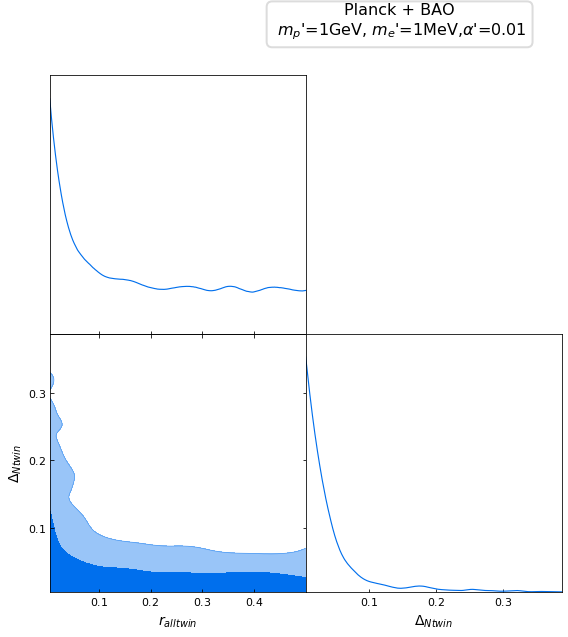

In [37]:
#flist = glob.glob('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me1MeV_alpha0.01_76640*/*txt')
froot='/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp1GeV_me1MeV_alpha0.01/2022-07-11_500000_'
samples = getdist.loadMCSamples(froot, settings={'ignore_rows': 0.3,'contours': [ 0.68,0.95],'smooth_scale_2D': 0.2})
g = gplot.get_subplot_plotter(width_inch=8)
g.triangle_plot(samples,params=['r_all_twin','Delta_N_twin'],filled=True)
plt.suptitle('Planck + BAO\n $m_p$\'=1GeV, $m_e$\'=1MeV,$\\alpha$\'=0.01',x=0.7, y=1.1, bbox=dict(facecolor='none',edgecolor='gainsboro',linewidth=2,boxstyle='round,pad=0.35'), fontsize=16)
#g.export('/home/d/dcurtin/jpbarron/ADM/r_vs_deltaNeff_1.png')
#g.export('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM/chains/ADM_FixedParams_HigherSigma_mp1GeV_me1MeV_alpha0.01_7409793/plots/r_vs_deltaNeff.png')

# Mp 10 GeV Me 1 MeV alpha_D 0.01

Text(0.7, 1.1, "Planck + BAO\n $m_p$'=10GeV, $m_e$'=1MeV,$\\alpha$'=0.01")

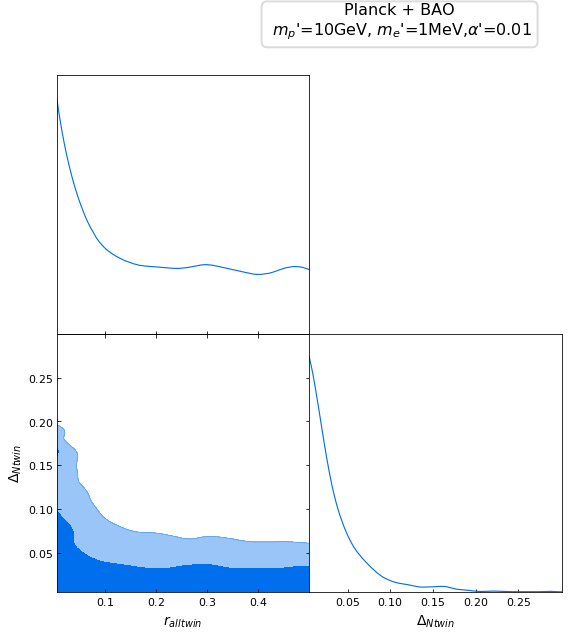

In [51]:
#flist = glob.glob('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me1MeV_alpha0.01_76640*/*txt')
froot='/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp10GeV_me1MeV_alpha0.01/2022-07-20_500000_'
samples = getdist.loadMCSamples(froot, settings={'ignore_rows': 0.3,'contours': [ 0.68,0.95],'smooth_scale_2D': 0.2})
g = gplot.get_subplot_plotter(width_inch=8)
g.triangle_plot(samples,params=['r_all_twin','Delta_N_twin'],filled=True)
plt.suptitle('Planck + BAO\n $m_p$\'=10GeV, $m_e$\'=1MeV,$\\alpha$\'=0.01',x=0.7, y=1.1, bbox=dict(facecolor='none',edgecolor='gainsboro',linewidth=2,boxstyle='round,pad=0.35'), fontsize=16)
#g.export('/home/d/dcurtin/jpbarron/ADM/r_vs_deltaNeff_1.png')
#g.export('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM/chains/ADM_FixedParams_HigherSigma_mp1GeV_me1MeV_alpha0.01_7409793/plots/r_vs_deltaNeff.png')

# Mp 100 GeV Me 1 MeV alpha_D 0.01


Text(0.7, 1.1, "Planck + BAO\n $m_p$'=100GeV, $m_e$'=1MeV,$\\alpha$'=0.01")

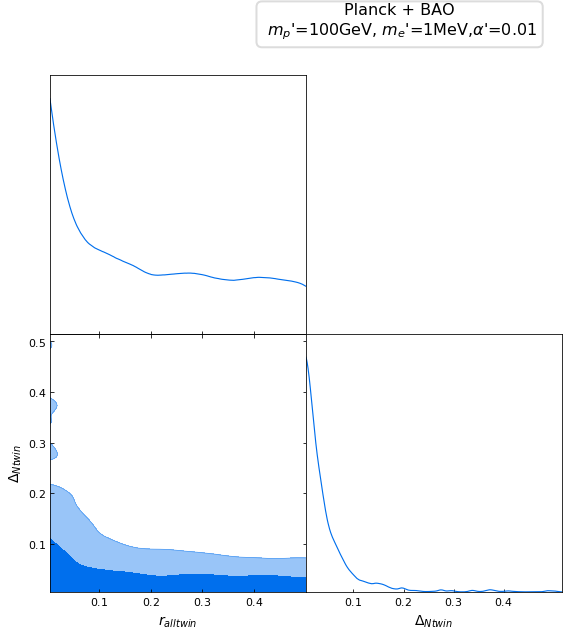

In [38]:
#flist = glob.glob('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me1MeV_alpha0.01_76640*/*txt')
froot='/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp100GeV_me1MeV_alpha0.01/2022-07-20_500000_'
samples = getdist.loadMCSamples(froot, settings={'ignore_rows': 0.3,'contours': [ 0.68,0.95],'smooth_scale_2D': 0.2})
g = gplot.get_subplot_plotter(width_inch=8)
g.triangle_plot(samples,params=['r_all_twin','Delta_N_twin'],filled=True)
plt.suptitle('Planck + BAO\n $m_p$\'=100GeV, $m_e$\'=1MeV,$\\alpha$\'=0.01',x=0.7, y=1.1, bbox=dict(facecolor='none',edgecolor='gainsboro',linewidth=2,boxstyle='round,pad=0.35'), fontsize=16)
#g.export('/home/d/dcurtin/jpbarron/ADM/r_vs_deltaNeff_1.png')
#g.export('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM/chains/ADM_FixedParams_HigherSigma_mp1GeV_me1MeV_alpha0.01_7409793/plots/r_vs_deltaNeff.png')

'using 48935 rows, 36 parameters; mean weight 5.101011545928272, tot weight 249618.0\nEquiv number of single samples (sum w)/max(w): 2972\nEffective number of weighted samples (sum w)^2/sum(w^2): 23840\n'

# Mp 10 GeV, Me 10 MeV, alpha_D 0.01


Text(0.7, 1.1, "Planck + BAO\n $m_p$'=10GeV, $m_e$'=10MeV,$\\alpha$'=0.01")

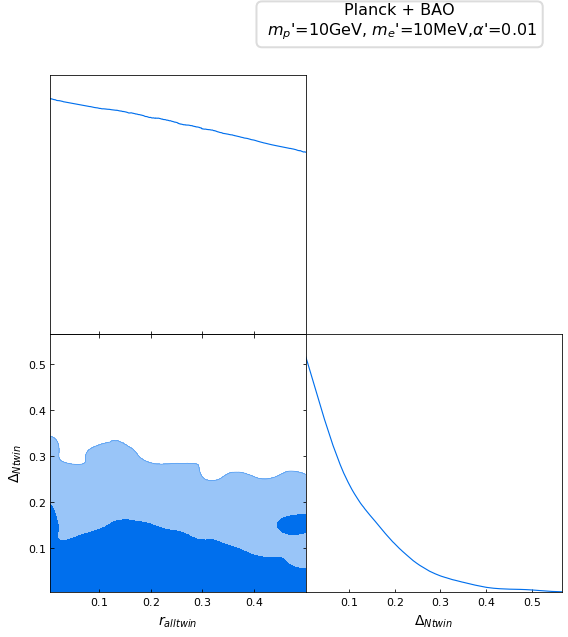

In [49]:
#flist = glob.glob('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me1MeV_alpha0.01_76640*/*txt')
froot='/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp10GeV_me10MeV_alpha0.01/2022-07-20_500000_'
samples = getdist.loadMCSamples(froot, settings={'ignore_rows': 0.5,'contours': [ 0.68,0.95],'smooth_scale_2D': 0.2})
g = gplot.get_subplot_plotter(width_inch=8)
g.triangle_plot(samples,params=['r_all_twin','Delta_N_twin'],filled=True)
plt.suptitle('Planck + BAO\n $m_p$\'=10GeV, $m_e$\'=10MeV,$\\alpha$\'=0.01',x=0.7, y=1.1, bbox=dict(facecolor='none',edgecolor='gainsboro',linewidth=2,boxstyle='round,pad=0.35'), fontsize=16)
#g.export('/home/d/dcurtin/jpbarron/ADM/r_vs_deltaNeff_1.png')
#g.export('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM/chains/ADM_FixedParams_HigherSigma_mp1GeV_me1MeV_alpha0.01_7409793/plots/r_vs_deltaNeff.png')

# Mp 1 GeV, Me 10 MeV, alpha_D 0.01


/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp1GeV_me10MeV_alpha0.01/2022-07-22_75000__13.txt
/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp1GeV_me10MeV_alpha0.01/2022-07-22_75000__5.txt
/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp1GeV_me10MeV_alpha0.01/2022-07-22_75000__10.txt
/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp1GeV_me10MeV_alpha0.01/2022-07-22_75000__8.txt
/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp1GeV_me10MeV_alpha0.01/2022-07-22_75000__6.txt
/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp1GeV_me10MeV_alpha0.01/2022-07-22_75000__11.txt
/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp1GeV_me10MeV_alpha0.01/2022-07-22_75000__4.txt
/project/d/dcurtin/jpbarron/ADM/montep

Text(0.7, 1.1, "Planck + BAO\n $m_p$'=1GeV, $m_e$'=10MeV,$\\alpha$'=0.01")

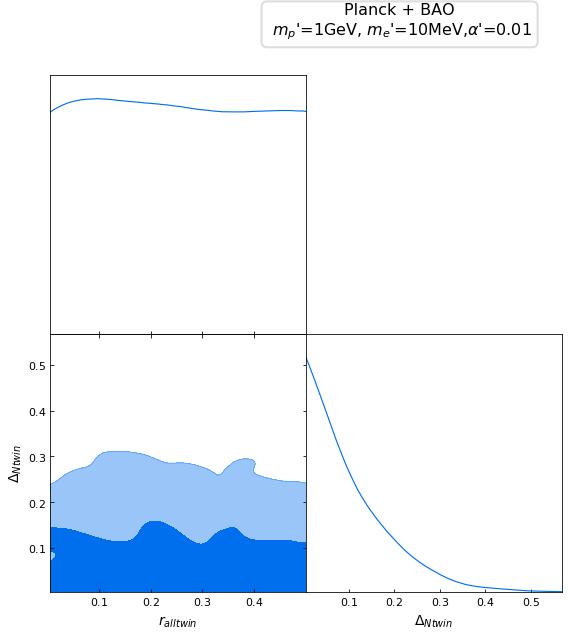

In [57]:
#flist = glob.glob('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me1MeV_alpha0.01_76640*/*txt')
froot='/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp1GeV_me10MeV_alpha0.01/2022-07-22_75000_'
samples = getdist.loadMCSamples(froot, settings={'ignore_rows': 0.5,'contours': [ 0.68,0.95],'smooth_scale_2D': 0.2})
g = gplot.get_subplot_plotter(width_inch=8)
g.triangle_plot(samples,params=['r_all_twin','Delta_N_twin'],filled=True)
plt.suptitle('Planck + BAO\n $m_p$\'=1GeV, $m_e$\'=10MeV,$\\alpha$\'=0.01',x=0.7, y=1.1, bbox=dict(facecolor='none',edgecolor='gainsboro',linewidth=2,boxstyle='round,pad=0.35'), fontsize=16)
#g.export('/home/d/dcurtin/jpbarron/ADM/r_vs_deltaNeff_1.png')
#g.export('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM/chains/ADM_FixedParams_HigherSigma_mp1GeV_me1MeV_alpha0.01_7409793/plots/r_vs_deltaNeff.png')

In [50]:
samples.getNumSampleSummaryText()

'using 48935 rows, 36 parameters; mean weight 5.101011545928272, tot weight 249618.0\nEquiv number of single samples (sum w)/max(w): 2972\nEffective number of weighted samples (sum w)^2/sum(w^2): 23840\n'

# Mp 1 GeV, Me 1 MeV, alpha_D 0.03


Text(0.7, 1.1, "Planck + BAO\n $m_p$'=1GeV, $m_e$'=1MeV,$\\alpha$'=0.03")

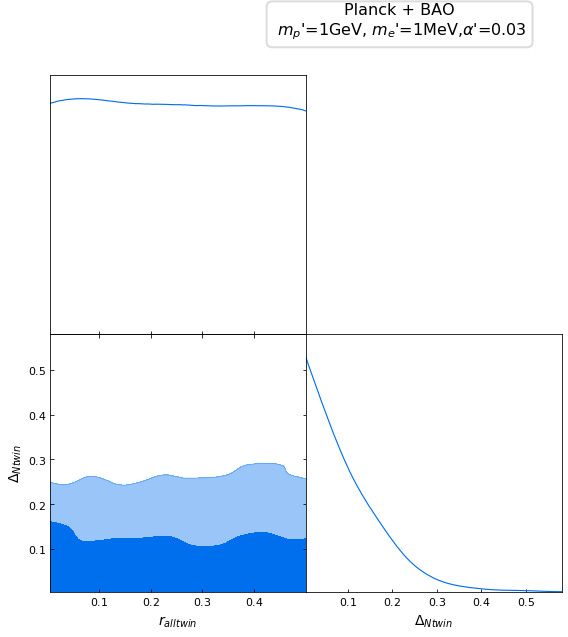

In [47]:
#flist = glob.glob('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/chains/ADM_mp1GeV_me1MeV_alpha0.01_76640*/*txt')
froot='/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM_2.9/collected_chains/mp1GeV_me1MeV_alpha0.03/2022-07-12_30000_'
samples = getdist.loadMCSamples(froot, settings={'ignore_rows': 0.5,'contours': [ 0.68,0.95],'smooth_scale_2D': 0.2})
g = gplot.get_subplot_plotter(width_inch=8)
g.triangle_plot(samples,params=['r_all_twin','Delta_N_twin'],filled=True)
plt.suptitle('Planck + BAO\n $m_p$\'=1GeV, $m_e$\'=1MeV,$\\alpha$\'=0.03',x=0.7, y=1.1, bbox=dict(facecolor='none',edgecolor='gainsboro',linewidth=2,boxstyle='round,pad=0.35'), fontsize=16)
#g.export('/home/d/dcurtin/jpbarron/ADM/r_vs_deltaNeff_1.png')
#g.export('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM/chains/ADM_FixedParams_HigherSigma_mp1GeV_me1MeV_alpha0.01_7409793/plots/r_vs_deltaNeff.png')

In [48]:
samples.getNumSampleSummaryText()

'using 271607 rows, 36 parameters; mean weight 5.090877628338003, tot weight 1382718.0\nEquiv number of single samples (sum w)/max(w): 11242\nEffective number of weighted samples (sum w)^2/sum(w^2): 135385\n'

In [10]:

samples = getdist.loadMCSamples('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM/chains/ADM_FixedParams_HigherSigma_mp1GeV_me1MeV_alpha0.01_7405976/2022-05-13_350000_', settings={'ignore_rows': 0.2,'contours': [ 0.68,0.95],'smooth_scale_2D': 0.3})
g = gplot.get_subplot_plotter()

g.triangle_plot(samples,params=['r_all_twin','Delta_N_twin'],filled=True)
plt.suptitle('Planck + BAO\n $m_p$\'=1GeV, $m_e$\'=1MeV,$\\alpha$\'=0.01',x=0.7, y=1.1, bbox=dict(facecolor='none',edgecolor='gainsboro',linewidth=2,boxstyle='round,pad=0.35'), fontsize=16)
g.export('/home/d/dcurtin/jpbarron/ADM/r_vs_deltaNeff_2.png')

#g.export('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/ADM/chains/ADM_FixedParams_HigherSigma_mp1GeV_me1MeV_alpha0.01_7405976/plots/r_vs_deltaNeff.png')

In [26]:
samples = getdist.loadMCSamples('/project/d/dcurtin/jpbarron/ADM/montepython/Lensing_BAO_Planck/LCDM/chains/LCDM_N600000_/2022-05-07_600000_', settings={'ignore_rows': 0.2})
g = gplot.get_subplot_plotter()

g.triangle_plot(samples,params=['omega_b','omega_cdm','100theta_s','n_s','H0'])